### Курсовой проект для курса "Python для Data Science"

In [1]:
# Материалы к проекту (файлы): train.csv test.csv

# Задание:
# Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры).
# С помощью полученной модели предсказать цены для квартир из файла test.csv.

# Целевая переменная: Price
# Основная метрика: R2 - коэффициент детерминации (sklearn.metrics.r2_score)
# Вспомогательная метрика: MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

# Сдача проекта:
# 1. Прислать в раздел Задания Урока 12 ("Вебинар. Консультация по итоговому проекту") ссылку на программу в github
# (программа должна содержаться в файле Jupyter Notebook с расширением ipynb).
# 2. Приложить файл с названием по образцу SShirkin_predictions.csv с предсказанными ценами для квартир из test.csv
# (файл должен содержать два поля: Id, Price).

# Сроки сдачи: Сдать проект за 24 часа до начала Урока 13 ("Вебинар. Результаты итоговых проектов и закрытие курса").

# Примечание:
# Все файлы csv должны содержать названия полей (header - то есть "шапку"), разделитель - запятая.
# В файлах не должны содержаться индексы из датафрейма.


In [2]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

In [3]:
data = pd.read_csv('input/train.csv')

In [4]:
data.shape

(10000, 20)

In [5]:
data.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

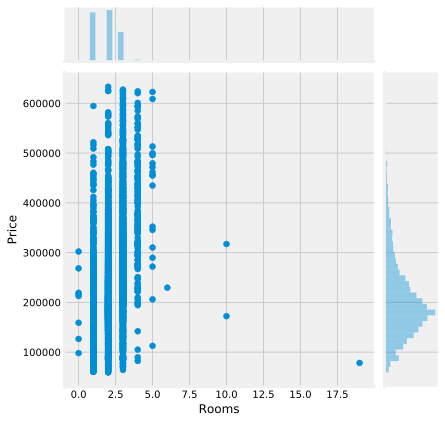

In [9]:
sns.jointplot(data['Rooms'], data['Price']);

In [10]:
data['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [11]:
data['Ecology_2'].unique(), data['Ecology_3'].unique(), data['Shops_2'].unique()

(array(['B', 'A'], dtype=object),
 array(['B', 'A'], dtype=object),
 array(['B', 'A'], dtype=object))

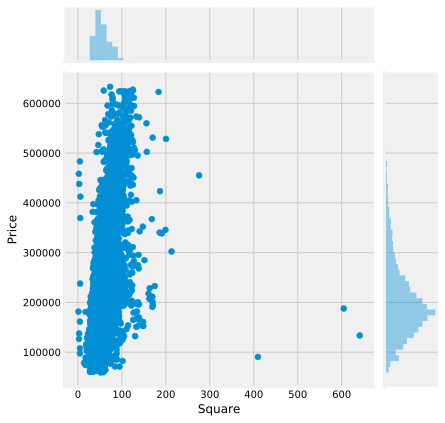

In [12]:
sns.jointplot(data['Square'], data['Price']);

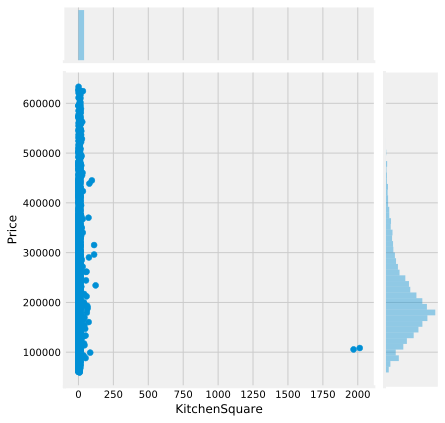

In [13]:
sns.jointplot(data['KitchenSquare'], data['Price']);

### train_test_split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [16]:
train.shape, valid.shape

((7000, 20), (3000, 20))

### Prepare train, valid

In [17]:
distr_info = train['DistrictId'].value_counts(normalize=True).reset_index().rename(columns={'index': 'DistrictId',
                                                                               'DistrictId': 'flat_qty_distr'})

In [18]:
distr_info.head()

DistrictId  flat_qty_distr
0          27        0.082000
1           1        0.066571
2          23        0.056286
3           6        0.050714
4           9        0.031714

In [19]:
distr_stat_dr = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().\
    rename(columns={'Price': 'mean_price_dr'})

distr_stat_r = train.groupby(['Rooms'], as_index=False)[['Price']].mean().\
    rename(columns={'Price': 'mean_price_r'})

mean_price = train['Price'].mean()

In [20]:
distr_stat_dr.head()

DistrictId  Rooms  mean_price_dr
0           0    1.0  145789.889600
1           0    2.0  198451.332808
2           0    3.0  291670.749162
3           1    1.0  147116.367405
4           1    2.0  198775.648383

In [21]:
distr_stat_r.head()

Rooms   mean_price_r
0    0.0  184599.160110
1    1.0  160134.810901
2    2.0  215287.628931
3    3.0  290867.452543
4    4.0  385776.526291

In [22]:
def prepare_rooms(df, source_df):
    df.loc[df['Rooms'] > 5, 'Rooms'] = source_df['Rooms'].median()
    return df

In [23]:
def fillna_life_square(df, source_df):
    df['LifeSquare'] = df['LifeSquare'].fillna(source_df['LifeSquare'].mean())
    return df    

In [24]:
def clean_kitchen_square(df):
    df.loc[df['KitchenSquare'] < 4, 'KitchenSquare'] = 4
    return df

In [25]:
def clean_year(df):
    df.loc[df['HouseYear'] > 2019, 'HouseYear'] = 2019
    return df

In [26]:
def add_district_info(df, distr_info):
    df = pd.merge(df, distr_info, on='DistrictId', how='left')
    df['flat_qty_distr'] = df['flat_qty_distr'].fillna(0.000143)
    return df

In [27]:
def add_stats(df, distr_stat_dr, distr_stat_r, mean_price):
    df = pd.merge(df, distr_stat_dr, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, distr_stat_r, on=['Rooms'], how='left')
    
    df['mean_price_r'] = df['mean_price_r'].fillna(mean_price)
    df['mean_price_dr'] = df['mean_price_dr'].fillna(df['mean_price_r'])
    return df

In [28]:
def add_cat_fts(df, cat_fts=('Ecology_2', 'Ecology_3', 'Shops_2')):
    for col in cat_fts:
        df[col] = (df[col] == 'B').astype(int)
    return df

In [29]:
def fillna_healthcare_1(df):
    df['Healthcare_1'] = df['Healthcare_1'].fillna(0)
    return df 

In [30]:
def prepare_data(df, distr_info, distr_stat_dr, distr_stat_r, source_df=train, mean_price=mean_price):
    df = prepare_rooms(df, source_df)
    df = fillna_life_square(df, source_df)
    df = clean_kitchen_square(df)
    df = clean_year(df)
    df = add_district_info(df, distr_info)
    df = add_stats(df, distr_stat_dr, distr_stat_r, mean_price)
    df = add_cat_fts(df)
    df = fillna_healthcare_1(df)
    return df

In [31]:
train = prepare_data(train, distr_info, distr_stat_dr, distr_stat_r) 

In [32]:
train.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  14604          23    1.0   41.681380   22.796166            8.0     14   
1   5621          23    3.0  163.495333  161.504222           12.0      5   
2    235          87    1.0   39.710131   19.538663            8.0      4   
3  16258          48    3.0   96.056784   98.152802            4.0     15   
4  10773          77    3.0   79.195825   44.421062           10.0     16   

   HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
0        17.0       2015   0.075779          1          1         6      1437   
1         3.0       1977   0.014073          1          1         2       475   
2        17.0       1986   0.100456          1          1        43      7227   
3         1.0       2017   0.041125          1          1        46      9515   
4        17.0       1984   0.298205          1          1        16      4048   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
0         3           0.0            0        2        1   88504.384965   
1         0           0.0            0        0        1  207007.956663   
2         0           0.0            1        6        0  182126.280899   
3         5           0.0            1       10        1  524365.550705   
4         3           0.0            1        3        1  322048.433990   

   flat_qty_distr  mean_price_dr   mean_price_r  
0        0.056286  102427.030975  160134.810901  
1        0.056286  165911.129700  290867.452543  
2        0.003000  169596.630515  160134.810901  
3        0.008857  382424.639356  290867.452543  
4        0.004000  251751.766701  290867.452543

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 23 columns):
Id                7000 non-null int64
DistrictId        7000 non-null int64
Rooms             7000 non-null float64
Square            7000 non-null float64
LifeSquare        7000 non-null float64
KitchenSquare     7000 non-null float64
Floor             7000 non-null int64
HouseFloor        7000 non-null float64
HouseYear         7000 non-null int64
Ecology_1         7000 non-null float64
Ecology_2         7000 non-null int32
Ecology_3         7000 non-null int32
Social_1          7000 non-null int64
Social_2          7000 non-null int64
Social_3          7000 non-null int64
Healthcare_1      7000 non-null float64
Helthcare_2       7000 non-null int64
Shops_1           7000 non-null int64
Shops_2           7000 non-null int32
Price             7000 non-null float64
flat_qty_distr    7000 non-null float64
mean_price_dr     7000 non-null float64
mean_price_r      7000 non-null float

In [34]:
valid = prepare_data(valid, distr_info, distr_stat_dr, distr_stat_r)

In [35]:
valid.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0   3702          21    2.0  48.812195   34.679779            5.0      5   
1  12848          61    3.0  81.103039   49.310278            8.0      4   
2   2239           6    3.0  82.882978    3.977650            4.0      8   
3  15611          23    1.0  33.863324   29.993297            4.0      5   
4   5634          52    1.0  43.095135   37.523283            4.0     10   

   HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
0         5.0       1963   0.034331          1          1        25      5487   
1         4.0       1960   0.298205          1          1        16      4048   
2        17.0       1977   0.243205          1          1         5      1564   
3         4.0       1977   0.034656          1          1         0       168   
4        17.0       1977   0.371149          1          1        34      7065   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
0         3           0.0            0        4        1  181530.459031   
1         3           0.0            1        3        1  260456.004692   
2         0         540.0            0        0        1  219945.304640   
3         0           0.0            0        0        1   66883.280318   
4         1         750.0            2        5        1  114086.065201   

   flat_qty_distr  mean_price_dr   mean_price_r  
0        0.015286  189591.187596  215287.628931  
1        0.012143  293153.148921  290867.452543  
2        0.050714  212694.797384  290867.452543  
3        0.056286  102427.030975  160134.810901  
4        0.013714  135270.547115  160134.810901

In [36]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
Id                3000 non-null int64
DistrictId        3000 non-null int64
Rooms             3000 non-null float64
Square            3000 non-null float64
LifeSquare        3000 non-null float64
KitchenSquare     3000 non-null float64
Floor             3000 non-null int64
HouseFloor        3000 non-null float64
HouseYear         3000 non-null int64
Ecology_1         3000 non-null float64
Ecology_2         3000 non-null int32
Ecology_3         3000 non-null int32
Social_1          3000 non-null int64
Social_2          3000 non-null int64
Social_3          3000 non-null int64
Healthcare_1      3000 non-null float64
Helthcare_2       3000 non-null int64
Shops_1           3000 non-null int64
Shops_2           3000 non-null int32
Price             3000 non-null float64
flat_qty_distr    3000 non-null float64
mean_price_dr     3000 non-null float64
mean_price_r      3000 non-null float

### Model RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor as RF

In [38]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'flat_qty_distr',
       'mean_price_dr', 'mean_price_r'],
      dtype='object')

In [39]:
feats = ['Square', 'Rooms', 'HouseYear', 'mean_price_dr', 'mean_price_r', 'flat_qty_distr', 'LifeSquare', 'KitchenSquare',
         'Ecology_2', 'Ecology_3', 'Shops_2', 'Healthcare_1', 'Helthcare_2']

In [40]:
model = RF(n_estimators=1000, max_depth=18, max_features=1, random_state=42)

In [41]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=42, verbose=0, warm_start=False)

In [42]:
pred_train = model.predict(train.loc[:, feats])
pred_train

array([ 92730.63788955, 211669.38740363, 179870.16405655, ...,
       238868.90057267, 198069.24744999, 407382.30693176])

In [43]:
pred_valid = model.predict(valid.loc[:, feats])
pred_valid

array([180915.36868627, 334336.40417418, 215328.98636408, ...,
       291438.48830616, 110830.12782679, 262401.44846027])

In [44]:
pred_train.shape, pred_valid.shape

((7000,), (3000,))

### Evaluation for Model RandomForestRegressor

In [45]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

In [46]:
r2(train['Price'], pred_train), mse(train['Price'], pred_train)

(0.9488979816971036, 441203821.52326846)

In [47]:
r2(valid['Price'], pred_valid), mse(valid['Price'], pred_valid)

(0.7117712599470578, 2479273006.0267296)

### Test

In [48]:
test = pd.read_csv('input/test.csv')

In [49]:
test.shape

(5000, 19)

In [50]:
test = prepare_data(test, distr_info, distr_stat_dr, distr_stat_r) 

In [51]:
test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183   37.523283            4.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            4.0     17   

   HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199          1          1        11      2748   
1         1.0       1977   0.075779          1          1         6      1437   
2         5.0       1909   0.000000          1          1        30      7538   
3        22.0       2007   0.101872          1          1        23      4583   
4        17.0       2017   0.072158          1          1         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  flat_qty_distr  \
0         1           0.0            0        0        1        0.016857   
1         3           0.0            0        2        1        0.011000   
2        87        4702.0            5        5        1        0.000571   
3         3           0.0            3        3        1        0.009429   
4         1           0.0            0        0        0        0.082000   

   mean_price_dr   mean_price_r  
0  170278.368262  215287.628931  
1  240692.688382  215287.628931  
2  160134.810901  160134.810901  
3  198197.383850  215287.628931  
4  123555.916178  160134.810901

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null int32
Ecology_3         5000 non-null int32
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      5000 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null int32
flat_qty_distr    5000 non-null float64
mean_price_dr     5000 non-null float64
mean_price_r      5000 non-null float64
dtypes: float64(10), int32(3), int64(

In [53]:
test['Price'] = model.predict(test.loc[:, feats])

In [54]:
test['Price'].describe()

count      5000.000000
mean     214780.808422
std       75563.725683
min       67496.594725
25%      165769.703792
50%      196507.440723
75%      249107.180537
max      572056.495035
Name: Price, dtype: float64

In [55]:
test.loc[:, ['Id', 'Price']].shape

(5000, 2)

In [56]:
test.loc[:, ['Id', 'Price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Id       5000 non-null int64
Price    5000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 117.2 KB


In [57]:
label_dict = {'fontsize': 14, 'color': '#808080', 'family': 'Calibri' }

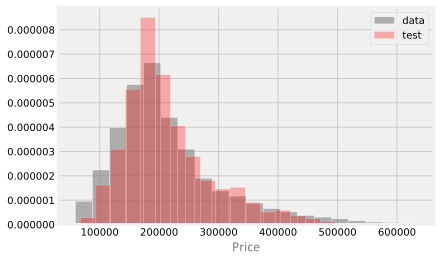

In [58]:
plt.hist(data['Price'], bins=20, density=True, alpha=0.6, ec='white', color='grey', label='data')
plt.hist(test['Price'], bins=20, density=True, alpha=0.3, ec='white', color='red', label='test')

plt.xlabel('Price', fontdict=label_dict)
plt.legend(loc='best')

plt.show()

In [59]:
test.loc[:, ['Id', 'Price']].to_csv('NSibekin_predictions.csv', index=None)